In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data/delaney_solubility_with_descriptors.csv')
data.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


## Data Splitting for the "Target variables" and "Predictors variables"
The data splitting follows the formula representation of a function which is `y = f(x)`. X is the input/s for the function (model) 
to generate the output y (predicted value / target variable). 
- `Y` = represents the target variable / predicted value / label / class / dependent variable
- `X` = represents the input variables / predictors / independent variables / features.
Predictors can be represented as vector values where y = (x1, x2, x3, ..., xn). Each predictor value determines the predicted value of the target variable.

In the case of regression models, the target variable is a typically a continuous numerical variable.

In [4]:
y_values = data['logS']
x_values = data.iloc[:, :4]

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=99)

In [6]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=99)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=99)

In [7]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

y_rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
y_rf_train_r2 = r2_score(y_train, y_rf_train_pred)
y_rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
y_rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [9]:
metrics = pd.DataFrame({"Random Forest Regressor" : [y_rf_train_mse, y_rf_train_r2, y_rf_test_mse, y_rf_test_r2]}).transpose()
metrics.columns = ["MSE (Train)", "MSE (Test)", "R2 (Train)", "R2 (Test)"]
metrics

,MSE (Train),MSE (Test),R2 (Train),R2 (Test)
Random Forest Regressor,1.124708,0.753167,0.896473,0.752495


Text(0.5, 1.0, 'Train dataset')

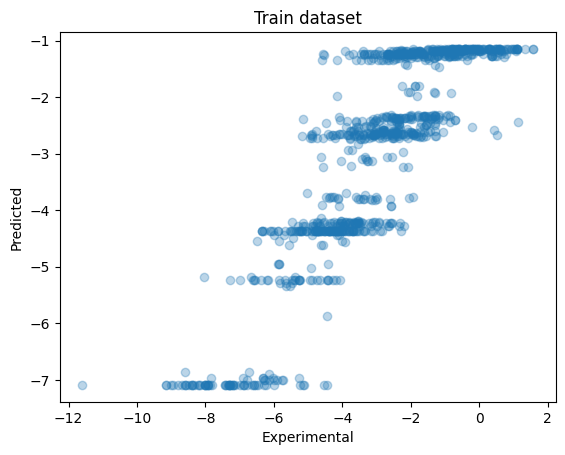

In [12]:
plt.scatter(y_train, y_rf_train_pred, alpha=0.3)
plt.ylabel("Predicted")
plt.xlabel("Experimental")
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

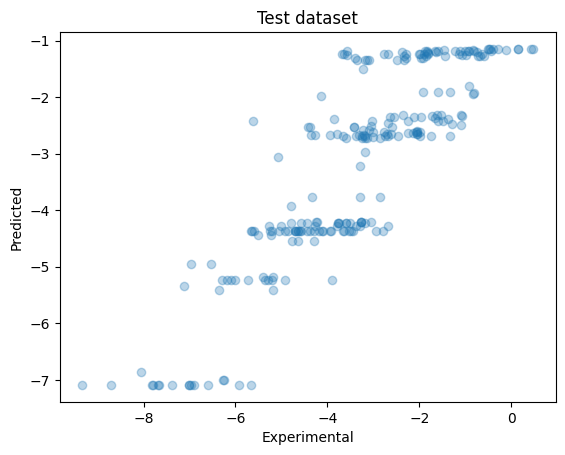

In [13]:
plt.scatter(y_test, y_rf_test_pred, alpha=0.3)
plt.ylabel("Predicted")
plt.xlabel("Experimental")
plt.title("Test dataset")